In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
%matplotlib inline

# import DBSCAN from sklearn
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
CLIENT_ID = 'A0SGXE0HY11MZF32LUWRYCIAVV4RXG1I2GDBWJQTP3PP0NF5' # your Foursquare ID
CLIENT_SECRET = '3KKVCKW1CJGCBCIGIIP5RAJJFK3HYD4PFZJ50MBPE14PYEFN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A0SGXE0HY11MZF32LUWRYCIAVV4RXG1I2GDBWJQTP3PP0NF5
CLIENT_SECRET:3KKVCKW1CJGCBCIGIIP5RAJJFK3HYD4PFZJ50MBPE14PYEFN


In [3]:
#location of Dhaka
latitude = 23.8103
longitude = 90.4125

In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=A0SGXE0HY11MZF32LUWRYCIAVV4RXG1I2GDBWJQTP3PP0NF5&client_secret=3KKVCKW1CJGCBCIGIIP5RAJJFK3HYD4PFZJ50MBPE14PYEFN&v=20180605&ll=23.8103,90.4125&limit=100'

In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edbe48ca2e538001b79154a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 1915,
  'headerLocation': 'Dhaka',
  'headerFullLocation': 'Dhaka',
  'headerLocationGranularity': 'city',
  'totalResults': 83,
  'suggestedBounds': {'ne': {'lat': 23.82620546751822,
    'lng': 90.43295258444945},
   'sw': {'lat': 23.79175926345151, 'lng': 90.3943004716487}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d8a04ae4757721e65aead69',
       'name': 'Soi 71',
       'location': {'address': 'Road 71',
        'crossStreet': 'Gulshan 2',
        'lat': 23.80453921614479,
        'lng': 90.41347092778884,
        'labeledLatLngs': [{'label': 'display',
     

In [6]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Soi 71,Thai Restaurant,23.804539,90.413471
1,Tabaq,Coffee Shop,23.812956,90.423879
2,Lobby of Radisson,Hotel Bar,23.816966,90.407251
3,Holey Artisan Bakery,Bakery,23.802537,90.416710
4,Burger Lab,Burger Joint,23.812615,90.424544


In [8]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

83 venues were returned by Foursquare.


In [9]:
df=nearby_venues[['lng','lat']]

In [10]:
Arr=df.to_numpy()

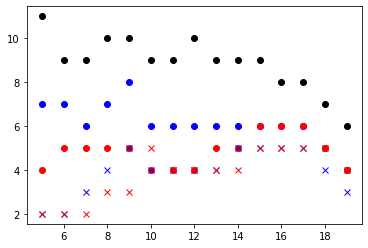

In [11]:
#checking out different values for eps and min_samples
dot = { 2: "ko",
        3: "bo", 
        4: "ro", 
        5: "bx",
        6: "rx"}

for i in range(5,20):
    for j in range(2,7):
        dbt = DBSCAN(eps=0.0001*i, min_samples=j).fit(Arr)
        labels = dbt.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        plt.plot(i,n_clusters_,dot[j])
    

Tried some of the combinations with more numbers of clusters and finalized this version:

In [12]:
db = DBSCAN(eps=0.0015, min_samples=2).fit(Arr) #created a db from lat and lng

In [13]:
labels = db.labels_
labels

array([ 0,  1,  2, -1,  1,  0,  3,  0,  0,  4,  4,  5,  4,  6,  2,  3, -1,
       -1,  6,  4,  4,  6,  3,  6,  7,  6,  6,  7,  2,  6, -1,  6,  5,  6,
        8, -1, -1, -1,  6,  6, -1,  6,  6,  2,  1,  6, -1,  8,  4,  6,  2,
        4,  6,  1,  3, -1,  1,  1,  2,  6, -1, -1,  2, -1,  1,  6,  4,  2,
        2,  2,  2,  2, -1,  3,  2, -1,  3, -1,  4,  1, -1, -1, -1])

In [14]:
nearby_venues['labels']=labels #appended the class to the dataframe

In [15]:
nearby_venues.head()

,name,categories,lat,lng,labels
0,Soi 71,Thai Restaurant,23.804539,90.413471,0
1,Tabaq,Coffee Shop,23.812956,90.423879,1
2,Lobby of Radisson,Hotel Bar,23.816966,90.407251,2
3,Holey Artisan Bakery,Bakery,23.802537,90.416710,-1
4,Burger Lab,Burger Joint,23.812615,90.424544,1


In [17]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

In [17]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [18]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [19]:
color = colors.tolist()

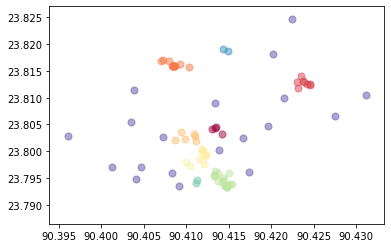

In [26]:
k=nearby_venues.apply(lambda row:plt.scatter(row["lng"], row["lat"], s=50, c=[color[row['labels']]], marker=u'o', alpha=0.5 ), axis=1)

In [41]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

#list of colors for folium
foliumcolor= ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 
              'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 
              'lightblue', 'lightgreen', 'black', 'lightgray', 'gray']

# Plot the points with colors, on map
nearby_venues.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]],
                                                   radius=5, color=color[row['labels']], 
                                                   fill=True, fill_color=foliumcolor[row['labels']], fill_opacity=0.7)
                                                    .add_to(map_clusters), axis=1)
   
map_clusters